# High-dimensional Asymptotics of VAEs: Threshold of Posterior Collapse and Dataset-Size Dependence of Rate-Distortion Curve

## Import Following Packages

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from src import data
from src import utils
from src import vae
from src import experiment

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Fix Seed

In [4]:
utils.fix_seed(100)

## Example of Linear VAE Training

In [5]:
feature_dim=1
x_dim, z_dim=100, 1
W0=torch.ones(x_dim, feature_dim)

model = vae.LinearVAE(x_dim, z_dim).to(device)
dataset=data.make_dataset_from_SCM(P=1000, N=x_dim, M=feature_dim, W0=W0, eta=1, rho=1.0).to(device)

history, model = vae.batchfit_linearvae(dataset, model, num_epoch=10000, beta=1.0, lr=0.001, reg_param=1.0, device=device)

【EPOCH 0】 eg: 2.2939, (elbo, recon, kl)=(53048.8984, 51964.0000, 961.7963)
【EPOCH 1000】 eg: 1.4070, (elbo, recon, kl)=(51336.4023, 50557.4180, 727.0120)
【EPOCH 2000】 eg: 0.8199, (elbo, recon, kl)=(51107.5859, 50382.8828, 688.2391)
【EPOCH 3000】 eg: 0.3508, (elbo, recon, kl)=(50970.2422, 50124.9141, 798.4910)
【EPOCH 4000】 eg: 0.1981, (elbo, recon, kl)=(50912.4961, 49996.3086, 859.7677)
【EPOCH 5000】 eg: 0.1595, (elbo, recon, kl)=(50899.9414, 49962.1992, 877.5621)
【EPOCH 6000】 eg: 0.1505, (elbo, recon, kl)=(50897.9531, 49954.5000, 882.0622)
【EPOCH 7000】 eg: 0.1489, (elbo, recon, kl)=(50897.7852, 49953.0508, 883.0253)
【EPOCH 8000】 eg: 0.1488, (elbo, recon, kl)=(50897.7773, 49952.8789, 883.1447)
【EPOCH 9000】 eg: 0.1488, (elbo, recon, kl)=(50897.7773, 49952.8750, 883.1495)


## Reproduce Dataset Size Dependence of Generalization Error

In [26]:
x_dim, z_dim=250, 1
W0=torch.ones(x_dim, z_dim)
num_epoch=15000
beta, reg_param=1, 1
alpha_list = [0.4*i for i in range(1, 14)]
results = experiment.replica_reproduce_1rank(x_dim,  alpha_list, 5, device=device, rho=1, eta=1,
                                             num_epoch=num_epoch,  beta=beta, lr=0.001, reg_param=reg_param)

alpha: 0.40
Epoch: 0, eg: 1.9342, (elbo, recon, kl)=(13068.4912, 12714.5430, 101.4312)
Epoch: 500, eg: 1.4324, (elbo, recon, kl)=(12810.0283, 12609.0244, 70.2559)
Epoch: 1000, eg: 1.2174, (elbo, recon, kl)=(12720.3174, 12590.2881, 61.0269)
Epoch: 1500, eg: 1.1197, (elbo, recon, kl)=(12679.0674, 12584.7969, 57.2967)
Epoch: 2000, eg: 1.0817, (elbo, recon, kl)=(12659.2402, 12581.7266, 56.2809)
Epoch: 2500, eg: 1.0684, (elbo, recon, kl)=(12649.8037, 12577.9844, 56.8377)
Epoch: 3000, eg: 1.0749, (elbo, recon, kl)=(12645.1943, 12571.4570, 58.9716)
Epoch: 3500, eg: 1.1031, (elbo, recon, kl)=(12642.5879, 12560.4326, 63.0522)
Epoch: 4000, eg: 1.1332, (elbo, recon, kl)=(12640.9785, 12546.8018, 68.2656)
Epoch: 4500, eg: 1.1574, (elbo, recon, kl)=(12640.1699, 12536.1826, 72.3847)
Epoch: 5000, eg: 1.1688, (elbo, recon, kl)=(12639.8516, 12530.6621, 74.5417)
Epoch: 5500, eg: 1.1726, (elbo, recon, kl)=(12639.7314, 12528.4170, 75.4229)
Epoch: 6000, eg: 1.1750, (elbo, recon, kl)=(12639.6797, 12527.5762,

Epoch: 8500, eg: 1.3310, (elbo, recon, kl)=(12756.8877, 12608.2480, 92.0105)
Epoch: 9000, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 9500, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 10000, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 10500, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 11000, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 11500, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 12000, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 12500, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0105)
Epoch: 13000, eg: 1.3310, (elbo, recon, kl)=(12756.8877, 12608.2480, 92.0105)
Epoch: 13500, eg: 1.3310, (elbo, recon, kl)=(12756.8877, 12608.2480, 92.0107)
Epoch: 14000, eg: 1.3310, (elbo, recon, kl)=(12756.8867, 12608.2471, 92.0106)
Epoch: 14500, eg: 1.3310, (elbo, recon, kl)=(12756.8877, 12608.2480

Epoch: 1500, eg: 1.1460, (elbo, recon, kl)=(25405.9648, 25231.2188, 124.0710)
Epoch: 2000, eg: 1.1142, (elbo, recon, kl)=(25380.8359, 25217.5098, 124.6949)
Epoch: 2500, eg: 1.1415, (elbo, recon, kl)=(25367.3613, 25198.6953, 130.6196)
Epoch: 3000, eg: 1.2092, (elbo, recon, kl)=(25359.3223, 25175.3398, 139.8294)
Epoch: 3500, eg: 1.2917, (elbo, recon, kl)=(25354.1270, 25153.3223, 148.9749)
Epoch: 4000, eg: 1.3071, (elbo, recon, kl)=(25350.4805, 25135.9492, 156.2559)
Epoch: 4500, eg: 1.3014, (elbo, recon, kl)=(25347.6445, 25122.3887, 161.9168)
Epoch: 5000, eg: 1.2908, (elbo, recon, kl)=(25345.5723, 25112.2910, 166.1121)
Epoch: 5500, eg: 1.2808, (elbo, recon, kl)=(25344.3535, 25105.9922, 168.7135)
Epoch: 6000, eg: 1.2739, (elbo, recon, kl)=(25343.8086, 25102.8848, 169.9894)
Epoch: 6500, eg: 1.2706, (elbo, recon, kl)=(25343.6133, 25101.6758, 170.4794)
Epoch: 7000, eg: 1.2700, (elbo, recon, kl)=(25343.5566, 25101.3027, 170.6258)
Epoch: 7500, eg: 1.2709, (elbo, recon, kl)=(25343.5449, 25101.21

Epoch: 9000, eg: 1.2084, (elbo, recon, kl)=(37879.3711, 37544.4453, 251.8682)
Epoch: 9500, eg: 1.1287, (elbo, recon, kl)=(37877.7148, 37538.8984, 254.1648)
Epoch: 10000, eg: 1.1091, (elbo, recon, kl)=(37876.9766, 37536.5039, 255.1428)
Epoch: 10500, eg: 1.1124, (elbo, recon, kl)=(37876.7812, 37535.7344, 255.4594)
Epoch: 11000, eg: 1.1168, (elbo, recon, kl)=(37876.7461, 37535.5117, 255.5519)
Epoch: 11500, eg: 1.1186, (elbo, recon, kl)=(37876.7461, 37535.4609, 255.5750)
Epoch: 12000, eg: 1.1191, (elbo, recon, kl)=(37876.7422, 37535.4453, 255.5798)
Epoch: 12500, eg: 1.1191, (elbo, recon, kl)=(37876.7500, 37535.4492, 255.5808)
Epoch: 13000, eg: 1.1191, (elbo, recon, kl)=(37876.7461, 37535.4453, 255.5803)
Epoch: 13500, eg: 1.1191, (elbo, recon, kl)=(37876.7461, 37535.4453, 255.5810)
Epoch: 14000, eg: 1.1191, (elbo, recon, kl)=(37876.7461, 37535.4453, 255.5803)
Epoch: 14500, eg: 1.1191, (elbo, recon, kl)=(37876.7461, 37535.4453, 255.5804)
Epoch: 0, eg: 1.9281, (elbo, recon, kl)=(38307.1602, 3

Epoch: 1500, eg: 1.2204, (elbo, recon, kl)=(37847.7188, 37586.7656, 195.9971)
Epoch: 2000, eg: 1.1795, (elbo, recon, kl)=(37810.3203, 37557.3047, 198.6049)
Epoch: 2500, eg: 1.1912, (elbo, recon, kl)=(37786.6992, 37517.0195, 212.1425)
Epoch: 3000, eg: 1.2322, (elbo, recon, kl)=(37771.1992, 37474.4570, 229.4148)
Epoch: 3500, eg: 1.2692, (elbo, recon, kl)=(37762.5430, 37444.9141, 241.8625)
Epoch: 4000, eg: 1.2891, (elbo, recon, kl)=(37758.3633, 37429.2852, 248.4822)
Epoch: 4500, eg: 1.2973, (elbo, recon, kl)=(37756.4180, 37421.8477, 251.6464)
Epoch: 5000, eg: 1.3021, (elbo, recon, kl)=(37755.4961, 37418.3438, 253.1576)
Epoch: 5500, eg: 1.3077, (elbo, recon, kl)=(37755.0586, 37416.6094, 253.9204)
Epoch: 6000, eg: 1.3146, (elbo, recon, kl)=(37754.8477, 37415.7148, 254.3235)
Epoch: 6500, eg: 1.3216, (elbo, recon, kl)=(37754.7656, 37415.2695, 254.5337)
Epoch: 7000, eg: 1.3274, (elbo, recon, kl)=(37754.7422, 37415.0664, 254.6354)
Epoch: 7500, eg: 1.3314, (elbo, recon, kl)=(37754.7344, 37414.98

Epoch: 9000, eg: 1.5307, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6541)
Epoch: 9500, eg: 1.5300, (elbo, recon, kl)=(50539.0234, 50107.6211, 337.6540)
Epoch: 10000, eg: 1.5297, (elbo, recon, kl)=(50539.0234, 50107.6211, 337.6541)
Epoch: 10500, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6541)
Epoch: 11000, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6540)
Epoch: 11500, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6541)
Epoch: 12000, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6540)
Epoch: 12500, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6541)
Epoch: 13000, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6540)
Epoch: 13500, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6540)
Epoch: 14000, eg: 1.5296, (elbo, recon, kl)=(50539.0273, 50107.6250, 337.6540)
Epoch: 14500, eg: 1.5296, (elbo, recon, kl)=(50539.0312, 50107.6250, 337.6547)
Epoch: 0, eg: 1.7377, (elbo, recon, kl)=(51489.1562, 5

Epoch: 1500, eg: 1.3025, (elbo, recon, kl)=(62948.9492, 62547.0000, 330.8128)
Epoch: 2000, eg: 1.2689, (elbo, recon, kl)=(62904.0156, 62518.1680, 327.0470)
Epoch: 2500, eg: 1.2799, (elbo, recon, kl)=(62879.3242, 62489.7852, 333.2266)
Epoch: 3000, eg: 1.3196, (elbo, recon, kl)=(62864.5039, 62459.9453, 344.7427)
Epoch: 3500, eg: 1.3690, (elbo, recon, kl)=(62855.0508, 62432.4609, 357.0648)
Epoch: 4000, eg: 1.3989, (elbo, recon, kl)=(62848.7891, 62410.2461, 367.5251)
Epoch: 4500, eg: 1.4212, (elbo, recon, kl)=(62844.6875, 62393.8086, 375.4461)
Epoch: 5000, eg: 1.4355, (elbo, recon, kl)=(62842.1367, 62382.6133, 380.9190)
Epoch: 5500, eg: 1.4411, (elbo, recon, kl)=(62840.6172, 62375.6055, 384.3696)
Epoch: 6000, eg: 1.4368, (elbo, recon, kl)=(62839.6445, 62371.3359, 386.4530)
Epoch: 6500, eg: 1.4198, (elbo, recon, kl)=(62838.9102, 62368.4883, 387.8103)
Epoch: 7000, eg: 1.3869, (elbo, recon, kl)=(62838.2383, 62366.1758, 388.8796)
Epoch: 7500, eg: 1.3360, (elbo, recon, kl)=(62837.5625, 62363.99

Epoch: 9000, eg: 0.5991, (elbo, recon, kl)=(62817.6562, 62309.9258, 412.0907)
Epoch: 9500, eg: 0.5987, (elbo, recon, kl)=(62817.6562, 62309.9219, 412.0912)
Epoch: 10000, eg: 0.5986, (elbo, recon, kl)=(62817.6562, 62309.9219, 412.0910)
Epoch: 10500, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0909)
Epoch: 11000, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0912)
Epoch: 11500, eg: 0.5986, (elbo, recon, kl)=(62817.6484, 62309.9141, 412.0910)
Epoch: 12000, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0910)
Epoch: 12500, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0910)
Epoch: 13000, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0910)
Epoch: 13500, eg: 0.5986, (elbo, recon, kl)=(62817.6484, 62309.9141, 412.0909)
Epoch: 14000, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0910)
Epoch: 14500, eg: 0.5986, (elbo, recon, kl)=(62817.6523, 62309.9180, 412.0910)
alpha: 2.40
Epoch: 0, eg: 2.0543, (elbo, recon, kl)=(7

Epoch: 1500, eg: 1.2423, (elbo, recon, kl)=(76045.7109, 75570.6719, 397.7321)
Epoch: 2000, eg: 1.1367, (elbo, recon, kl)=(75995.7500, 75544.2031, 388.8887)
Epoch: 2500, eg: 1.0557, (elbo, recon, kl)=(75965.3906, 75510.5000, 395.7089)
Epoch: 3000, eg: 0.9934, (elbo, recon, kl)=(75943.8438, 75464.9453, 414.4469)
Epoch: 3500, eg: 0.9400, (elbo, recon, kl)=(75928.1328, 75419.4766, 435.6227)
Epoch: 4000, eg: 0.8913, (elbo, recon, kl)=(75916.9688, 75383.4375, 452.7535)
Epoch: 4500, eg: 0.8544, (elbo, recon, kl)=(75909.2344, 75357.2031, 465.2599)
Epoch: 5000, eg: 0.8348, (elbo, recon, kl)=(75904.1172, 75339.5312, 473.6703)
Epoch: 5500, eg: 0.8335, (elbo, recon, kl)=(75900.8516, 75328.4766, 478.8867)
Epoch: 6000, eg: 0.8492, (elbo, recon, kl)=(75898.7891, 75321.6719, 482.0613)
Epoch: 6500, eg: 0.8793, (elbo, recon, kl)=(75897.4219, 75317.3672, 484.0554)
Epoch: 7000, eg: 0.9191, (elbo, recon, kl)=(75896.5234, 75314.6094, 485.3253)
Epoch: 7500, eg: 0.9619, (elbo, recon, kl)=(75895.9688, 75312.96

Epoch: 9000, eg: 0.6661, (elbo, recon, kl)=(88158.4609, 87484.2188, 571.4639)
Epoch: 9500, eg: 0.6661, (elbo, recon, kl)=(88158.4688, 87484.2266, 571.4642)
Epoch: 10000, eg: 0.6662, (elbo, recon, kl)=(88158.4688, 87484.2266, 571.4641)
Epoch: 10500, eg: 0.6662, (elbo, recon, kl)=(88158.4688, 87484.2344, 571.4641)
Epoch: 11000, eg: 0.6662, (elbo, recon, kl)=(88158.4766, 87484.2344, 571.4641)
Epoch: 11500, eg: 0.6662, (elbo, recon, kl)=(88158.4688, 87484.2344, 571.4640)
Epoch: 12000, eg: 0.6662, (elbo, recon, kl)=(88158.4688, 87484.2344, 571.4643)
Epoch: 12500, eg: 0.6662, (elbo, recon, kl)=(88158.4766, 87484.2344, 571.4640)
Epoch: 13000, eg: 0.6662, (elbo, recon, kl)=(88158.4688, 87484.2344, 571.4647)
Epoch: 13500, eg: 0.6662, (elbo, recon, kl)=(88158.4766, 87484.2344, 571.4635)
Epoch: 14000, eg: 0.6662, (elbo, recon, kl)=(88158.4766, 87484.2344, 571.4656)
Epoch: 14500, eg: 0.6662, (elbo, recon, kl)=(88158.4766, 87484.2344, 571.4641)
Epoch: 0, eg: 1.8457, (elbo, recon, kl)=(89675.2422, 8

Epoch: 1500, eg: 1.3072, (elbo, recon, kl)=(100956.2812, 100318.0312, 551.6177)
Epoch: 2000, eg: 1.2720, (elbo, recon, kl)=(100885.6172, 100263.1797, 546.6693)
Epoch: 2500, eg: 1.2828, (elbo, recon, kl)=(100844.2422, 100212.1172, 557.7332)
Epoch: 3000, eg: 1.3234, (elbo, recon, kl)=(100817.8438, 100165.2422, 574.7354)
Epoch: 3500, eg: 1.3854, (elbo, recon, kl)=(100800.3359, 100125.9453, 591.5073)
Epoch: 4000, eg: 1.4750, (elbo, recon, kl)=(100788.5156, 100095.0625, 605.6557)
Epoch: 4500, eg: 1.4721, (elbo, recon, kl)=(100779.6719, 100069.9141, 617.5290)
Epoch: 5000, eg: 1.3182, (elbo, recon, kl)=(100771.3828, 100045.6562, 629.0754)
Epoch: 5500, eg: 1.0971, (elbo, recon, kl)=(100762.3203, 100019.5156, 641.4431)
Epoch: 6000, eg: 0.8742, (elbo, recon, kl)=(100753.9531, 99995.7969, 652.5553)
Epoch: 6500, eg: 0.7112, (elbo, recon, kl)=(100748.4844, 99980.2500, 659.7991)
Epoch: 7000, eg: 0.6153, (elbo, recon, kl)=(100745.8516, 99972.5938, 663.3627)
Epoch: 7500, eg: 0.5659, (elbo, recon, kl)=

Epoch: 8000, eg: 0.4880, (elbo, recon, kl)=(101061.8984, 100310.5625, 647.4899)
Epoch: 8500, eg: 0.4858, (elbo, recon, kl)=(101061.7812, 100309.8516, 647.8767)
Epoch: 9000, eg: 0.4856, (elbo, recon, kl)=(101061.7500, 100309.6172, 648.0035)
Epoch: 9500, eg: 0.4856, (elbo, recon, kl)=(101061.7656, 100309.5703, 648.0403)
Epoch: 10000, eg: 0.4856, (elbo, recon, kl)=(101061.7578, 100309.5469, 648.0482)
Epoch: 10500, eg: 0.4856, (elbo, recon, kl)=(101061.7578, 100309.5469, 648.0494)
Epoch: 11000, eg: 0.4856, (elbo, recon, kl)=(101061.7500, 100309.5391, 648.0495)
Epoch: 11500, eg: 0.4856, (elbo, recon, kl)=(101061.7500, 100309.5391, 648.0495)
Epoch: 12000, eg: 0.4856, (elbo, recon, kl)=(101061.7500, 100309.5391, 648.0493)
Epoch: 12500, eg: 0.4856, (elbo, recon, kl)=(101061.7578, 100309.5469, 648.0494)
Epoch: 13000, eg: 0.4856, (elbo, recon, kl)=(101061.7500, 100309.5391, 648.0495)
Epoch: 13500, eg: 0.4856, (elbo, recon, kl)=(101061.7578, 100309.5469, 648.0494)
Epoch: 14000, eg: 0.4856, (elbo,

Epoch: 14500, eg: 0.5430, (elbo, recon, kl)=(113496.1250, 112655.8828, 732.2072)
Epoch: 0, eg: 1.8251, (elbo, recon, kl)=(114623.1016, 113529.6875, 867.2842)
Epoch: 500, eg: 1.4893, (elbo, recon, kl)=(113686.8516, 112872.1641, 687.3259)
Epoch: 1000, eg: 1.3208, (elbo, recon, kl)=(113440.5859, 112738.2891, 615.3747)
Epoch: 1500, eg: 1.1930, (elbo, recon, kl)=(113340.7812, 112689.8359, 584.7151)
Epoch: 2000, eg: 1.0961, (elbo, recon, kl)=(113288.3750, 112642.8281, 585.7054)
Epoch: 2500, eg: 0.9887, (elbo, recon, kl)=(113251.8516, 112573.0312, 613.0782)
Epoch: 3000, eg: 0.8405, (elbo, recon, kl)=(113220.8984, 112488.4531, 653.9629)
Epoch: 3500, eg: 0.6829, (elbo, recon, kl)=(113194.3125, 112409.4297, 692.9945)
Epoch: 4000, eg: 0.5704, (elbo, recon, kl)=(113175.9688, 112354.1172, 719.9314)
Epoch: 4500, eg: 0.5099, (elbo, recon, kl)=(113166.1641, 112323.7344, 734.5681)
Epoch: 5000, eg: 0.4831, (elbo, recon, kl)=(113161.7891, 112309.3438, 741.5598)
Epoch: 5500, eg: 0.4738, (elbo, recon, kl)=

Epoch: 6000, eg: 0.4654, (elbo, recon, kl)=(125790.5703, 124833.3281, 838.6708)
Epoch: 6500, eg: 0.4604, (elbo, recon, kl)=(125789.4922, 124829.7422, 840.4540)
Epoch: 7000, eg: 0.4598, (elbo, recon, kl)=(125789.2188, 124828.8047, 840.9307)
Epoch: 7500, eg: 0.4599, (elbo, recon, kl)=(125789.1719, 124828.6406, 841.0143)
Epoch: 8000, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0172)
Epoch: 8500, eg: 0.4600, (elbo, recon, kl)=(125789.1562, 124828.6250, 841.0143)
Epoch: 9000, eg: 0.4600, (elbo, recon, kl)=(125789.1562, 124828.6250, 841.0136)
Epoch: 9500, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0135)
Epoch: 10000, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0135)
Epoch: 10500, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0135)
Epoch: 11000, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0135)
Epoch: 11500, eg: 0.4600, (elbo, recon, kl)=(125789.1641, 124828.6328, 841.0133)
Epoch: 12000, eg: 0.4600, (elbo, rec

Epoch: 12500, eg: 0.4063, (elbo, recon, kl)=(126006.5859, 125087.3281, 810.0331)
Epoch: 13000, eg: 0.4063, (elbo, recon, kl)=(126006.5859, 125087.3281, 810.0339)
Epoch: 13500, eg: 0.4063, (elbo, recon, kl)=(126006.5938, 125087.3281, 810.0358)
Epoch: 14000, eg: 0.4063, (elbo, recon, kl)=(126006.5859, 125087.3281, 810.0334)
Epoch: 14500, eg: 0.4063, (elbo, recon, kl)=(126006.5859, 125087.3281, 810.0331)
Epoch: 0, eg: 1.9841, (elbo, recon, kl)=(127508.0312, 126303.4609, 960.2473)
Epoch: 500, eg: 1.5767, (elbo, recon, kl)=(126307.1328, 125412.4062, 758.5981)
Epoch: 1000, eg: 1.3762, (elbo, recon, kl)=(125983.8828, 125211.7578, 680.5426)
Epoch: 1500, eg: 1.2105, (elbo, recon, kl)=(125846.5078, 125129.2578, 647.8281)
Epoch: 2000, eg: 1.0339, (elbo, recon, kl)=(125772.2578, 125059.0156, 651.3419)
Epoch: 2500, eg: 0.8203, (elbo, recon, kl)=(125717.1406, 124960.1562, 688.8226)
Epoch: 3000, eg: 0.6120, (elbo, recon, kl)=(125670.4453, 124836.3125, 748.8870)
Epoch: 3500, eg: 0.4665, (elbo, recon, 

Epoch: 3500, eg: 0.9694, (elbo, recon, kl)=(138369.6562, 137496.0625, 793.2812)
Epoch: 4000, eg: 0.8099, (elbo, recon, kl)=(138349.9219, 137438.5938, 822.3976)
Epoch: 4500, eg: 0.6606, (elbo, recon, kl)=(138333.0156, 137388.2031, 847.9849)
Epoch: 5000, eg: 0.5542, (elbo, recon, kl)=(138321.5000, 137352.6562, 866.1506)
Epoch: 5500, eg: 0.4932, (elbo, recon, kl)=(138315.5000, 137332.6406, 876.6197)
Epoch: 6000, eg: 0.4632, (elbo, recon, kl)=(138313.0938, 137323.4062, 881.6443)
Epoch: 6500, eg: 0.4498, (elbo, recon, kl)=(138312.3438, 137319.8438, 883.6661)
Epoch: 7000, eg: 0.4440, (elbo, recon, kl)=(138312.1562, 137318.6719, 884.3542)
Epoch: 7500, eg: 0.4417, (elbo, recon, kl)=(138312.1250, 137318.3594, 884.5498)
Epoch: 8000, eg: 0.4407, (elbo, recon, kl)=(138312.1094, 137318.2812, 884.5923)
Epoch: 8500, eg: 0.4404, (elbo, recon, kl)=(138312.0938, 137318.2656, 884.5975)
Epoch: 9000, eg: 0.4403, (elbo, recon, kl)=(138312.0938, 137318.2656, 884.5972)
Epoch: 9500, eg: 0.4403, (elbo, recon, k

Epoch: 9500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6080)
Epoch: 10000, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6082)
Epoch: 10500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6081)
Epoch: 11000, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6081)
Epoch: 11500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6089)
Epoch: 12000, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6074)
Epoch: 12500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6060)
Epoch: 13000, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6057)
Epoch: 13500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6083)
Epoch: 14000, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6078)
Epoch: 14500, eg: 0.3920, (elbo, recon, kl)=(150740.6719, 149614.9531, 1003.6097)
Epoch: 0, eg: 1.9760, (elbo, recon, kl)=(153351.7812, 151999.2344, 1115.0681)
Epoch: 500, eg: 1.573

Epoch: 500, eg: 1.3648, (elbo, recon, kl)=(151222.8750, 150148.6719, 941.0547)
Epoch: 1000, eg: 1.1836, (elbo, recon, kl)=(150884.9688, 149950.0469, 843.3854)
Epoch: 1500, eg: 1.0284, (elbo, recon, kl)=(150747.2188, 149863.0000, 810.2669)
Epoch: 2000, eg: 0.8690, (elbo, recon, kl)=(150677.9844, 149786.5625, 820.3032)
Epoch: 2500, eg: 0.6955, (elbo, recon, kl)=(150629.4375, 149692.9062, 857.8477)
Epoch: 3000, eg: 0.5348, (elbo, recon, kl)=(150589.1406, 149593.0000, 905.0266)
Epoch: 3500, eg: 0.4182, (elbo, recon, kl)=(150559.8750, 149514.5781, 943.0933)
Epoch: 4000, eg: 0.3487, (elbo, recon, kl)=(150542.1406, 149464.8750, 967.4612)
Epoch: 4500, eg: 0.3140, (elbo, recon, kl)=(150532.8125, 149436.4531, 981.7744)
Epoch: 5000, eg: 0.2997, (elbo, recon, kl)=(150528.4375, 149421.3125, 989.7368)
Epoch: 5500, eg: 0.2951, (elbo, recon, kl)=(150526.5938, 149413.7656, 993.8931)
Epoch: 6000, eg: 0.2942, (elbo, recon, kl)=(150525.8594, 149410.2031, 995.9427)
Epoch: 6500, eg: 0.2945, (elbo, recon, kl

Epoch: 6500, eg: 0.4153, (elbo, recon, kl)=(163646.6250, 162507.0625, 1031.2604)
Epoch: 7000, eg: 0.3945, (elbo, recon, kl)=(163645.3125, 162502.0469, 1034.0525)
Epoch: 7500, eg: 0.3869, (elbo, recon, kl)=(163644.9844, 162500.5000, 1034.9493)
Epoch: 8000, eg: 0.3842, (elbo, recon, kl)=(163644.9375, 162500.0938, 1035.2029)
Epoch: 8500, eg: 0.3833, (elbo, recon, kl)=(163644.9062, 162499.9844, 1035.2695)
Epoch: 9000, eg: 0.3831, (elbo, recon, kl)=(163644.9062, 162499.9688, 1035.2849)
Epoch: 9500, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2875)
Epoch: 10000, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2877)
Epoch: 10500, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2878)
Epoch: 11000, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2878)
Epoch: 11500, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2877)
Epoch: 12000, eg: 0.3830, (elbo, recon, kl)=(163644.9219, 162499.9688, 1035.2878)
Epoch: 12500, eg: 0.383

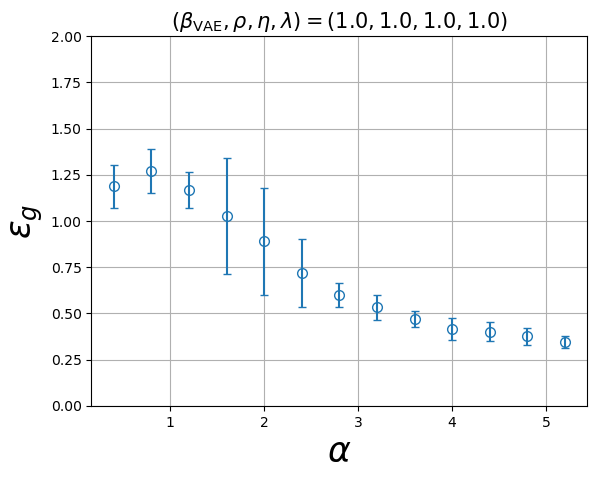

In [27]:
results_np=np.array(results)
egs_np = results_np[:, :, -1]
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.errorbar(np.array(alpha_list), egs_np.mean(axis=1), yerr=egs_np.std(axis=1), capsize=3, fmt='o', ecolor='tab:blue', ms=7, mfc='None', mec='tab:blue')
ax.set_ylim([0, 2])
ax.set_xlabel(r"$\alpha$", fontsize=25)
ax.set_ylabel(r"$\varepsilon_{g}$", fontsize=25)
ax.set_title(r"$(\beta_{\mathrm{VAE}}, \rho, \eta, \lambda)=(1.0, 1.0, 1.0, 1.0)$", fontsize=15)
ax.grid()
plt.show()